<a href="https://colab.research.google.com/github/CeHaga/dsa-python-fundamentals/blob/master/Chapter_09/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9 - Exercises
Exercises from chapter 9 of Data Science Academy's course Python Fundamentals for Data Analysis

In [1]:
# Imports
import time
import numpy as np
import pandas as pd
import matplotlib as mat
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [2]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extração de Dados

In [3]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
df['target_name'] = iris.target_names[iris.target]
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
118,7.7,2.6,6.9,2.3,virginica
15,5.7,4.4,1.5,0.4,setosa
81,5.5,2.4,3.7,1.0,versicolor
30,4.8,3.1,1.6,0.2,setosa
26,5.0,3.4,1.6,0.4,setosa


In [6]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df['target'] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name,target
126,6.2,2.8,4.8,1.8,virginica,2
43,5.0,3.5,1.6,0.6,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
41,4.5,2.3,1.3,0.3,setosa,0
90,5.5,2.6,4.4,1.2,versicolor,1


In [7]:
# Extraia as features (atributos) do dataset e imprima 
print(df['sepal length (cm)'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64


In [8]:
print(df['sepal width (cm)'])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64


In [9]:
print(df['petal length (cm)'])

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64


In [10]:
print(df['petal width (cm)'])

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64


In [11]:
# Calcule a média de cada feature para as 3 classes
df.groupby('target_name').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_name,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


## Exploração de Dados

In [12]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5,5,5.2,5.2,4.7,4.8,5.4,5.2,5.5,4.9,5,5.5,4.9,4.4,5.1,...,6.5,6.4,6.8,5.7,5.8,6.4,6.5,7.7,7.7,6,6.9,5.6,7.7,6.3,6.7,7.2,6.2,6.1,6.4,7.2,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,6,6.9,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3,3,4,4.4,3.9,3.5,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3,3.4,3.5,3.4,3.2,3.1,3.4,4.1,4.2,3.1,3.2,3.5,3.6,3,3.4,...,3.2,2.7,3,2.5,2.8,3.2,3,3.8,2.6,2.2,3.2,2.8,2.8,2.7,3.3,3.2,2.8,3,2.8,3,2.8,3.8,2.8,2.8,2.6,3,3.4,3.1,3,3.1,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.4,1.3,1.5,...,5.1,5.3,5.5,5,5.1,5.3,5.5,6.7,6.9,5,5.7,4.9,6.7,4.9,5.7,6,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,...,2,1.9,2.1,2,2.4,2.3,1.8,2.2,2.3,1.5,2.3,2,2,1.8,2.1,1.8,1.8,1.8,2.1,1.6,1.9,2,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8
target_name,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
target,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [13]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_name        150 non-null    object 
 5   target             150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
# Faça um resumo estatístico do dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
# Verifique se existem valores nulos no dataset
df.isnull().values.any()

False

In [16]:
df.groupby('sepal length (cm)').size()

sepal length (cm)
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
dtype: int64

## Plot

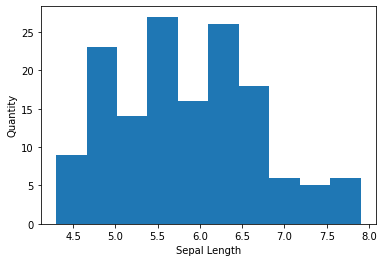

In [29]:
# Crie um Histograma de sepal length
plt.hist(df['sepal length (cm)'])
plt.xlabel('Sepal Length')
plt.ylabel('Quantity')
plt.show()

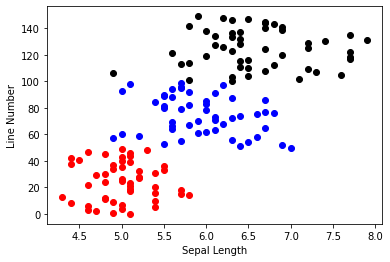

In [28]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target
types = [df.loc[df['target'] == i] for i in range(3)]
colors = ['red','blue','black']
for t,c in zip(types,colors):
  plt.scatter(t['sepal length (cm)'],t.index,c=c)
plt.xlabel('Sepal Length')
plt.ylabel('Line Number')
plt.show()

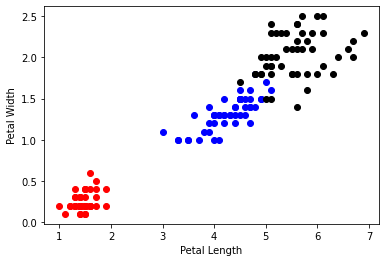

In [31]:
# Crie um Scatter Plot de 2 Features (atributos)
types = [df.loc[df['target'] == i] for i in range(3)]
colors = ['red','blue','black']
for t,c in zip(types,colors):
  plt.scatter(t['petal length (cm)'],t['petal width (cm)'],c=c)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

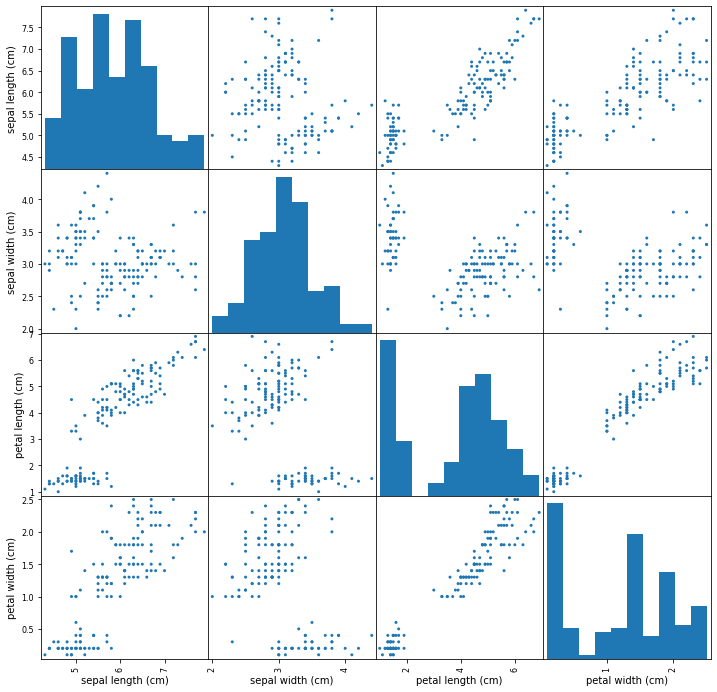

In [42]:
# Crie um Scatter Matrix das Features (atributos)
feats = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
pd.plotting.scatter_matrix(feats, figsize=(12,12),alpha=1)
plt.show()

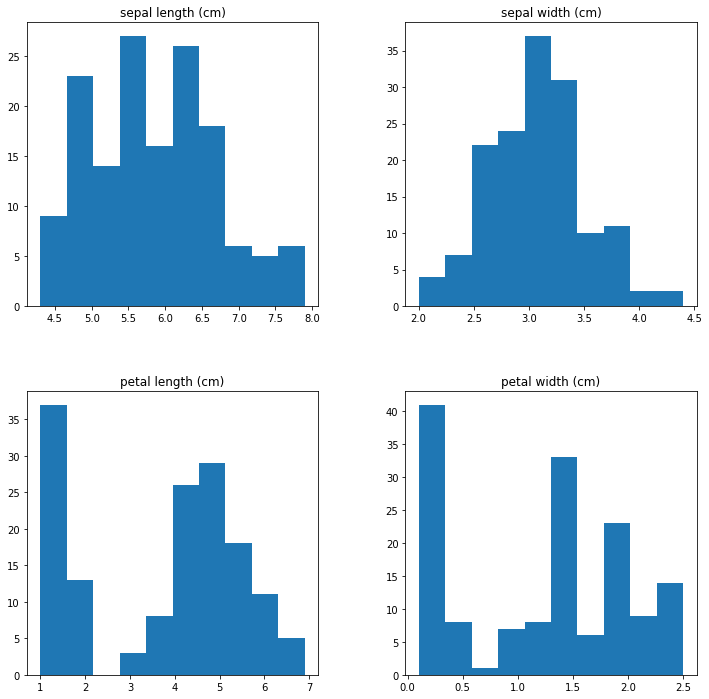

In [49]:
# Crie um Histograma de todas as features
feats.hist(grid=False,figsize=(12,12))
plt.show()